# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [21]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


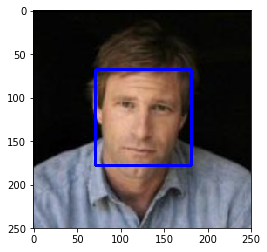

In [22]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [23]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return (len(faces) > 0)

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [24]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_face_in_human_files_short = 0
human_face_in_dog_files_short = 0

for i in range(100):
    if face_detector(human_files_short[i]):
        human_face_in_human_files_short +=1
    if face_detector(dog_files_short[i]):
        human_face_in_dog_files_short +=1
        
print( 'The percentage of human faces detected in the first 100 human faces is: ' + str(human_face_in_human_files_short) + ' %')
    
print( 'The percentage of human faces detected in the first 100 dog faces is: ' + str(human_face_in_dog_files_short) + ' %')


The percentage of human faces detected in the first 100 human faces is: 96 %
The percentage of human faces detected in the first 100 dog faces is: 18 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [26]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
#VGG16.features[0]

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, we will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [27]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
import torch

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    img = Image.open(img_path)


    img_transforms= transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(
                                    [0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225]
                                    )])
    img1 = img_transforms(img)
    img1 =img1.reshape(1,3,224,224)
    #print(img1.shape)
    if use_cuda:
        img1 = img1.to('cuda')
    output = VGG16(img1)
    _,class_pred = torch.max(output,1)
    output_class = class_pred.item()
    return output_class # predicted class index

In [28]:
img_path = r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages\test\001.Affenpinscher\Affenpinscher_00003.jpg'
prediction = VGG16_predict(img_path)
print('ImageNet class for image at specified path :' + str(prediction))

ImageNet class for image at specified path :252


Predicted Class :affenpinscher, monkey pinscher, monkey dog


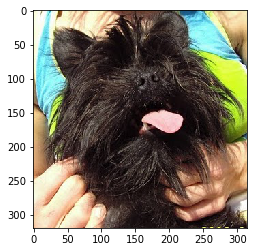

In [29]:
from matplotlib.pyplot import imshow
%matplotlib inline 

with open('imagenet1000_clsid_to_human.txt','r') as inf:
    dict_from_file = eval(inf.read())

img = Image.open(img_path)
imshow(img)

print('Predicted Class :' + str(dict_from_file[prediction]))


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [30]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return (prediction >= 151 and prediction <=268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

I have printed the answer below

In [92]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_detected_in_human_files_short = 0
dog_detected_in_dog_files_short = 0

for i in range(100):
    if dog_detector(human_files_short[i]):
        dog_detected_in_human_files_short +=1
    if dog_detector(dog_files_short[i]):
        dog_detected_in_dog_files_short +=1
        
print( 'The percentage of dogs detected in the first 100 human faces is: ' + str(dog_detected_in_human_files_short))
    
print( 'The percentage of dogs detected in the first 100 dog faces is: ' + str(dog_detected_in_dog_files_short))

The percentage of dogs detected in the first 100 human faces is: 0
The percentage of dogs detected in the first 100 dog faces is: 93


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
#from sampler import ImbalancedDatasetSampler
import os
from torchvision import datasets
import numpy as np
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
##from torch.utils.data.sampler import Sampler

train_transform = transforms.Compose([
                               transforms.Resize(255),
                               transforms.CenterCrop(224), 
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.ToTensor(),
                               transforms.Normalize(
                               [0.5,0.5,0.5],
                               [0.5,0.5,0.5])])

test_transform = transforms.Compose([
                               transforms.Resize(255),
                               transforms.CenterCrop(224), 
                               transforms.ToTensor(),
                               transforms.Normalize(
                               [0.5,0.5,0.5],
                               [0.5,0.5,0.5])])

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
img_path= (r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages')

train_data = datasets.ImageFolder(root = img_path +'/train' , transform = train_transform )
valid_data = datasets.ImageFolder(root = img_path +'/valid' , transform = test_transform )
test_data = datasets.ImageFolder(root = img_path +'/test'   , transform = test_transform )

train_loader = torch.utils.data.DataLoader(train_data,batch_size = 16,shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = 16,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 16,shuffle = True)

loaders= {}
loaders['train'] = train_loader
loaders['valid'] = valid_loader
loaders['test']  = test_loader

loaders_scratch = loaders


#### Class Imbalance : There are dof breeds where only 26 pictures are provided while there are dog breed class where 77 pictures are provided. We are NOT taking care of the class imbalance , Data Augmentation as part of this notebook

In [95]:
filePath = (r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages\train')
class_num = 0
for dirpath, dirnames, filenames in os.walk(filePath):
    #print(dirpath)
    if (class_num != 0):
        print("Files in  class ", class_num, len(filenames))
    class_num +=1
    

Files in  class  1 64
Files in  class  2 58
Files in  class  3 52
Files in  class  4 63
Files in  class  5 77
Files in  class  6 64
Files in  class  7 50
Files in  class  8 66
Files in  class  9 34
Files in  class  10 50
Files in  class  11 66
Files in  class  12 66
Files in  class  13 46
Files in  class  14 69
Files in  class  15 73
Files in  class  16 59
Files in  class  17 62
Files in  class  18 50
Files in  class  19 48
Files in  class  20 62
Files in  class  21 64
Files in  class  22 47
Files in  class  23 65
Files in  class  24 62
Files in  class  25 37
Files in  class  26 41
Files in  class  27 64
Files in  class  28 35
Files in  class  29 74
Files in  class  30 52
Files in  class  31 56
Files in  class  32 65
Files in  class  33 45
Files in  class  34 64
Files in  class  35 53
Files in  class  36 65
Files in  class  37 50
Files in  class  38 57
Files in  class  39 69
Files in  class  40 53
Files in  class  41 69
Files in  class  42 63
Files in  class  43 50
Files in  class  44 

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I picked the size of 224 since that since that tensor size is used by the existing model and it would reduce the input size and hence the paramters as well.

I have augmented the Train data using rotation, Flipping so that it can be provide a better result on my test data. My model was overfitting the train dataset without this.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np

use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.Conv1 =  nn.Conv2d(3,64,3,1)
        self.Conv2 =  nn.Conv2d(64,64,3,1)
        self.pool1 = nn.MaxPool2d(2,2)
        self.Conv3 = nn.Conv2d(64,128,3,1)
        self.Conv4 = nn.Conv2d(128,128,3,1)
        self.pool2 = nn.MaxPool2d(2,2)
        self.Conv5 = nn.Conv2d(128,256,3,1)
        self.Conv6 = nn.Conv2d(256,256,3,1)
        #self.Conv7 = nn.Conv2D(256,256,3,1)
        self.pool3 = nn.MaxPool2d(2,2)
        self.Conv8 = nn.Conv2d(256,512,3,1)
        self.pool4 = nn.MaxPool2d(2,2)
        self.Conv9 = nn.Conv2d(512,512,3,1)
        self.pool5 = nn.MaxPool2d(2,2)
        #self.Conv10 = nn.Conv2d(512,512,3,1)
        self.FC1 =   nn.Linear(512*4*4,1024)
        self.FC2 = nn.Linear(1024,512)
        self.FC3 = nn.Linear(512,133)
        
        ##Dropout of 20%
        
        self.Dropout = nn.Dropout(p=0.2)

        
        
    def forward(self, x):
        ## Define forward behavior
        x = self.Conv1(x)
        x = self.Conv2(x)
        x = F.relu(x) ######
        x = self.pool1(x)
        x = self.Conv3(x)
        x = self.Conv4(x)
        x = F.relu(x) ######
        x = self.pool2(x)
        x = self.Conv5(x)
        x = self.Conv6(x)
        x = F.relu(x) ######
        x = self.pool3(x)
        x = self.Conv8(x)
        x = self.pool4(x)
        x = self.Conv9(x)
        x = self.pool5(x)
        # flatten image input
        #print(x.shape)
        x = x.reshape(-1, 512*4*4)
        x = self.FC1(x) ## added relu
        x = self.Dropout(x) 
        x = self.FC2(x) ## added relu
        x = self.Dropout(x)
        x = self.FC3(x)
        x = F.log_softmax(x,dim=1)
        return x
    
def weights_init_norm(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        n =m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0,y)
        m.bias.data.fill_(0)

#-#-#

# instantiate the CNN
model_scratch = Net()

## Added this line
model_scratch.apply(weights_init_norm)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  This architecure in originally inspired by VGG16.Initially, I have removed some of the Convnet layers to reduce the number of parameters and computation cost. Tha max number of simultaneous Convnet layers used here is 2. I got 92.54% train accuracy using this architecture in 10 epochs and 97.14% train accuracy with this model in 15 epochs. However, my validation accuracy is not that great 11.56%.

So there is no bias in my architecture and I dont need to make my architecture complex. Removing some of the conv Layers is ok. But the model is definitely overfittinng. The Validation Error started increasing after 6 epochs. So I added relu to my Fully connected layer. But the model started behaving poor after adding the relu to the FC layer.I also noticed that removing relu after the last conv Layer also helps in the performance.But I still have the overfitting problem. So I used Dropout in the FC Layers with probablity of 20%. I even added variation to my Train transform by RandomCrop and Horizontal Flip. Now I see that I could train for longer epochs before the validation set starts overfitting.

##### Deciding the Learning rate:
The learning rate chosen for this problem is .0001

##### NOTE::

I see there are class imbalance here. There are Breeds where there are only 26 samples while  there are samples where there are 77 samples. I have not resolved the Class Imbalance here

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [3]:
import torch.optim as optim
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr= .0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [5]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (image,label) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                image,label = image.cuda(), label.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer_scratch.zero_grad()
            output = model_scratch(image)
            loss = criterion_scratch(output,label)
            loss.backward()
            optimizer_scratch.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        validation_accuracy = 0.0
        for batch_idx, (image,label) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                image,label = image.cuda(), label.cuda()
            ## update the average validation loss
            output = model_scratch(image)
            loss = criterion_scratch(output,label)
            
            prob = torch.exp(output)
            _,class_pred = prob.topk(1, dim =1)
            equals = class_pred== label.view(*class_pred.shape)
            validation_accuracy += torch.mean(equals.type(torch.FloatTensor))            
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        ##Print Validation Accuracy
        print('Validation Accuracy :::::: ' + str(validation_accuracy.item()*100/len(loaders['valid'])) + str(' %'))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min ):    
            print('Saving Model')
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss 
    
    # return trained model
    return model


# train the model
model_scratch = train(18, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.161959 	Validation Loss: 4.100028
Validation Accuracy :::::: 8.529874513734061 %
Saving Model
Epoch: 2 	Training Loss: 3.992896 	Validation Loss: 3.979014
Validation Accuracy :::::: 8.726415094339623 %
Saving Model
Epoch: 3 	Training Loss: 3.768166 	Validation Loss: 3.849973
Validation Accuracy :::::: 11.477987721281231 %
Saving Model
Epoch: 4 	Training Loss: 3.583978 	Validation Loss: 3.692664
Validation Accuracy :::::: 12.382075471698114 %
Saving Model
Epoch: 5 	Training Loss: 3.383066 	Validation Loss: 3.667952
Validation Accuracy :::::: 11.910377358490566 %
Saving Model
Epoch: 6 	Training Loss: 3.189255 	Validation Loss: 3.549608
Validation Accuracy :::::: 16.784590595173388 %
Saving Model
Epoch: 7 	Training Loss: 2.966557 	Validation Loss: 3.514634
Validation Accuracy :::::: 17.02043965177716 %
Saving Model
Epoch: 8 	Training Loss: 2.761177 	Validation Loss: 3.486555
Validation Accuracy :::::: 19.57547169811321 %
Saving Model
Epoch: 9 	Training Loss: 2.5

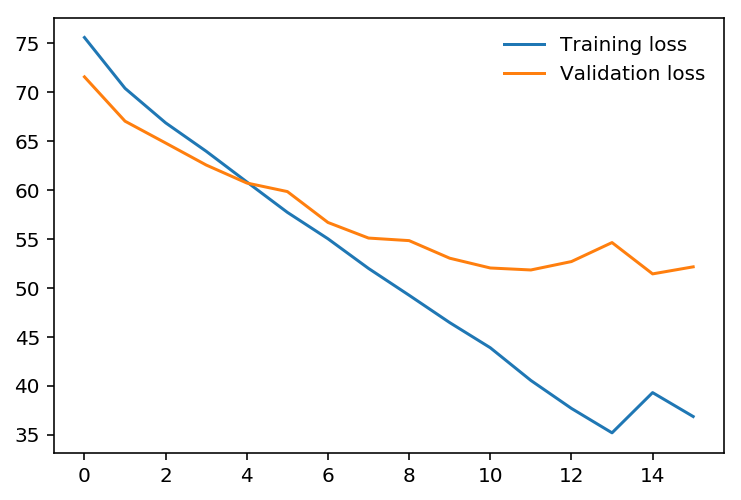

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(training_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend(frameon=False)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.180820


Test Accuracy: 26% (224/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [4]:
## TODO: Specify data loaders

import os
from torchvision import datasets
import numpy as np
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

##from torch.utils.data.sampler import Sampler

train_transform = transforms.Compose([
                               transforms.Resize(255),
                               transforms.CenterCrop(224), 
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.ToTensor(),
                               transforms.Normalize(
                               [0.485, 0.456, 0.406],
                               [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
                               transforms.Resize(255),
                               transforms.CenterCrop(224), 
                               transforms.ToTensor(),
                               transforms.Normalize(
                               [0.485, 0.456, 0.406],
                               [0.229, 0.224, 0.225])])

### Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
img_path= (r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages')

train_data = datasets.ImageFolder(root = img_path +'/train' , transform = train_transform )
valid_data = datasets.ImageFolder(root = img_path +'/valid' , transform = test_transform )
test_data = datasets.ImageFolder(root = img_path +'/test'   , transform = test_transform )

train_loader = torch.utils.data.DataLoader(train_data,batch_size = 8,shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = 8,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 8,shuffle = True)

loaders= {}
loaders['train'] = train_loader
loaders['valid'] = valid_loader
loaders['test']  = test_loader

loaders_transfer = loaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [32]:
import torchvision.models as models
import torch.nn as nn
import torch
from torch import optim

use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer = models.densenet161(pretrained = True)

for parms in model_transfer.features.parameters():
    parms.requires_grad = False
    
classifier = nn.Sequential(nn.Linear(2208,1024),
                            nn.ReLU(),
                            nn.Linear(1024,512),
                            nn.ReLU(),
                            nn.Linear(512,133),
                            nn.LogSoftmax(dim =1))

model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()


C:\Users\Kaustav\Anaconda3\envs\deeplearning\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

DenseNet161 gave one of the best result in ImageNet1000 Dataset with top 1 Error rate of 22.35% .My data is similar to the ImageNet Dataset. Actually dogs are part of this Multiclass ImageNet. So I choose this model so that I may acheive a higher accuracy rate. I have achieved an accuracy of 78.1% on the test dataset.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:
criterion_transfer = nn.NLLLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr= .001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
## I have ran for 2 epochs at a time and restarted the kernel to address the CUDA Memory Issues
n_epochs= 2
load_model='Y'
    
if (load_model == 'Y'):
    # load the model that got the best validation accuracy (uncomment the line below)
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    print('Model Loaded')
else:
    print('model not loaded')

Model Loaded


In [10]:
import time 

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    ##valid_loss_min = np.Inf 
    valid_loss_min = 0.610065
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        start = time.time()
        ###################
        # train the model #
        ###################
        model_transfer.train()
        for batch_idx, (image, label) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                image, label = image.cuda(), label.cuda()
                
            ##*****
            if ((batch_idx + 1) % 400 == 0):
                print('batch count : ' + str(batch_idx + 1))
            
            ##*****
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer_transfer.zero_grad()
            output = model_transfer(image)
            loss = criterion_transfer(output,label)
            loss.backward()
            optimizer_transfer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model_transfer.eval()
        validation_accuracy = 0.0
        for batch_idx, (image, label) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            ## update the average validation loss
            output = model_transfer(image)
            loss = criterion_transfer(output,label)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            prob = torch.exp(output)
            _,class_pred = prob.topk(1, dim =1)
            equals = class_pred== label.view(*class_pred.shape)
            validation_accuracy += torch.mean(equals.type(torch.FloatTensor))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        print('Validation Accuracy :::::: ' + str(validation_accuracy.item()/len(loaders['valid'])))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min ):    
            print('Saving Model')
            torch.save(model_transfer.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
        ##Print Time
        print('Time taken for epoch : '+ str(epoch)+ ' is ' + str(time.time()- start))
    # return trained model
    return model

##********************************************************
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

batch count : 200
batch count : 400
batch count : 600
batch count : 800
Epoch: 1 	Training Loss: 0.952398 	Validation Loss: 0.627687
Validation Accuracy :::::: 0.7904761904761904
Time taken for epoch : 1 is 138.02729678153992
batch count : 200
batch count : 400
batch count : 600
batch count : 800
Epoch: 2 	Training Loss: 0.873149 	Validation Loss: 0.596623
Validation Accuracy :::::: 0.7928571428571428
Saving Model
Time taken for epoch : 2 is 139.2810046672821


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [35]:
def test(loaders_transfer, model_transfer, criterion_transfer, use_cuda):
    
        model_transfer.eval()
        test_accuracy = 0.0
        test_loss= 0.0
        for batch_idx, (image, label) in enumerate(loaders_transfer):
            # move to GPU
            if use_cuda:
                image, label = image.cuda(), label.cuda()
            ## update the average validation loss
            output = model_transfer(image)
            loss = criterion_transfer(output,label)
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            
            prob = torch.exp(output)
            _,class_pred = prob.topk(1, dim =1)
            equals = class_pred== label.view(*class_pred.shape)
            test_accuracy += torch.mean(equals.type(torch.FloatTensor))
            
        # print training/validation statistics 
        print('\tTest Loss: {:.6f}'.format(
            test_loss
            ))
        
        print('\tTest Accuracy :::::: {:.2f} %'.format(
            test_accuracy.item()*100/len(loaders_transfer)
            ))
        
        ##print('\tTest Accuracy :::::: ' + str(test_accuracy.item()*100/len(loaders_transfer)) + ' %')

        
loaders_transfer = loaders['test']
model_transfer.load_state_dict(torch.load('model_transfer_best.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

	Test Loss: 0.630576
	Test Accuracy :::::: 78.21 %


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
##This cell is coded to create the list of class names

filePath = (r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages\train')

for dirpath, dirnames, filenames in os.walk(filePath):
    classes = dirnames
    break

class_list = str(classes).split(', ')
class_names = []
for i in range(133):
    class_names.append((class_list[i].split('.')[1][:-1].replace('_',' ')))

##print(class_names[1])
##Load the best model achieved through transfer learning
model_transfer.load_state_dict(torch.load('model_transfer_best.pt'))

In [15]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
import torch

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    img_transforms= transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(
                                    [0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225]
                                    )])
    img1 = img_transforms(img)
    img1 =img1.reshape(1,3,224,224)
    if use_cuda:
        img1 = img1.to('cuda')
    output = model_transfer(img1)
    pred = torch.exp(output)
    _,class_pred = pred.topk(1,dim =1)
    output_class = class_pred.item()
    
    return class_names[output_class]    

img_path = r'D:\Udacity\DL Course\deep-learning-v2-pytorch-master\project-dog-classification\dogImages\train\001.Affenpinscher\Affenpinscher_00001.jpg'
output =predict_breed_transfer(img_path)

print(output)

Affenpinscher


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.



def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        output =predict_breed_transfer(img_path)
        print('The predicted dog breed is ' + str(output))
    elif face_detector(img_path):
        output =predict_breed_transfer(img_path)
        print('Hello Human!!... You look like ' + str(output))
    else:
        print(" This doesn't seem to be a dog or human")
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

This problem was really complex.But I feel there can be a few improvements from here: 

1> We have seen that there is class imbalance. So we can resolve the class imbalance and try once again.

2> We can use ResNet-152 algorithm which gives little better performance than DenseNet161.

3> We can investigate the failed prediction and take necessary steps.

4> We can do Web Scrapping and find more dog pictures.Once we have those datasets. We can retrain the entire Model to update the weights as per the Dog Imageset.

Hello Human!!... You look like Chinese crested


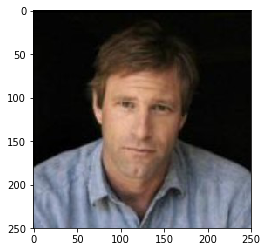

In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

import numpy as np
from glob import glob

from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline 


# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
file = human_files[0]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

Hello Human!!... You look like Pointer


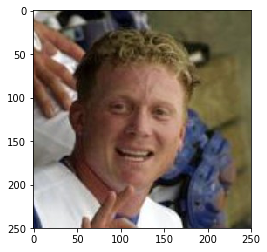

In [41]:
file = human_files[1]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

 This doesn't seem to be a dog or human


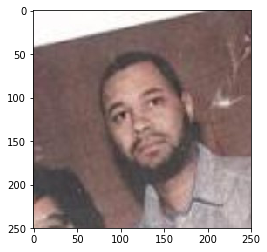

In [42]:
file = human_files[2]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Giant schnauzer


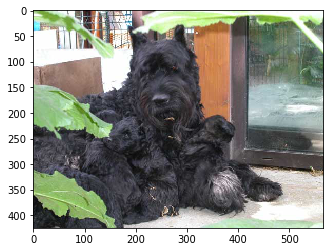

In [47]:
file = dog_files[240]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Beagle


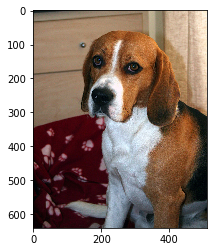

In [46]:
file = dog_files[120]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Affenpinscher


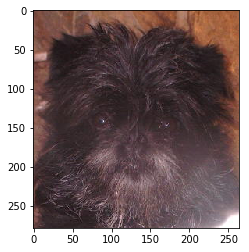

In [45]:
file = dog_files[6]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Afghan hound


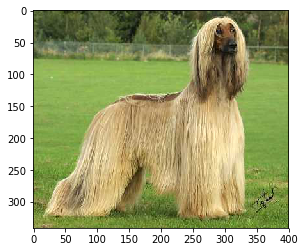

In [48]:
file = dog_files[9]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Anatolian shepherd dog


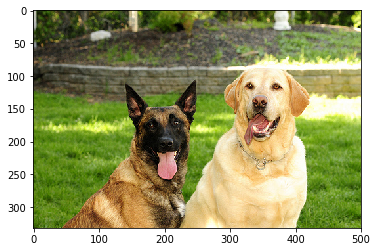

In [49]:
file = dog_files[150]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

The predicted dog breed is Airedale terrier


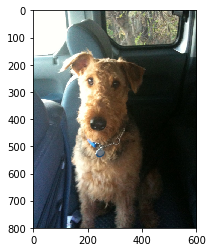

In [50]:
file = dog_files[19]
imgdisp = Image.open(file)
imshow(imgdisp)
run_app(file)

### This was fun. Hope you like it.